In [10]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
positive = np.random.uniform(0, 3, 10)
positive

array([2.71388797, 2.0179332 , 1.51922236, 2.53642508, 1.42780757,
       1.74567864, 2.21633225, 2.49040185, 1.20598208, 1.83790923])

In [4]:
negative = np.random.uniform(2, 5, 30)
negative

array([3.98168592, 3.20377401, 3.79756789, 2.50011419, 4.07874694,
       4.6858586 , 4.97676541, 4.4194373 , 4.60530476, 3.57903668,
       3.54971746, 2.01245631, 3.28301803, 2.24417387, 2.32770696,
       3.27642386, 4.88680975, 2.05662282, 4.36843775, 3.74523657,
       4.86561875, 4.76075773, 2.66335044, 2.80157699, 3.72607737,
       3.19033977, 4.8091838 , 3.79469235, 4.65432434, 2.40415605])

In [8]:
df = pd.DataFrame({'class' : 'positive', 'x' : positive}).append(pd.DataFrame({'class' : 'negative', 'x' :negative}))
df.head()

,class,x
0,positive,2.713888
1,positive,2.017933
2,positive,1.519222
3,positive,2.536425
4,positive,1.427808


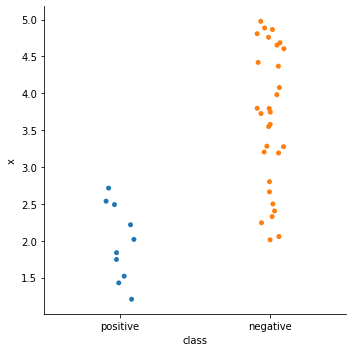

In [11]:
sns.catplot('class', 'x', data=df)

In [12]:
def entropia (vp):
    somatorio = 0;
    for p in vp :
        somatorio += 0 if (p == 0) else p * np.log2(p)    
    return somatorio * (-1)

def entropia_valores(valores):
    import collections
    counter = collections.Counter(valores)
    vp = [ (n/len(valores)) for n in counter.values() ]    
    return entropia(vp)    

def entropia_atributo(X, atributo, classe) :
    somatorio = 0    
    for valor, Xj in X.groupby(atributo):        
        p_Xj = len(Xj) / len(X)        
        E_Xj = entropia_valores(Xj[classe])
        somatorio += p_Xj * E_Xj        
    return somatorio

def entropia_atributo_detalhes(X, atributo, classe) :
    somatorio = 0
    detalhes = pd.DataFrame(columns = ['valor','prop_Xj'])
    for valor, Xj in X.groupby(atributo):        
        p_Xj = len(Xj) / len(X)        
        E_Xj = entropia_valores(Xj[classe])
        somatorio += p_Xj * E_Xj
        detalhes = detalhes.append({'valor' : valor, 'prop_Xj' : p_Xj, 'E(Xj)' : E_Xj }, 1)
    return somatorio, detalhes

def ganho_de_informacao(X,atributo,classe) :
    E_X = entropia_valores(X[classe])
    E_X_A = entropia_atributo(X,atributo,classe)
    return  E_X - E_X_A

def razao_de_ganho (X, atributo, classe):
    IG = ganho_de_informacao(X, atributo, classe)
    I = entropia_valores(X[atributo])
    return IG / I

In [41]:
df_sort = df.sort_values(by='x')
df_sort.iloc[0,:]['class']

'positive'

In [49]:
df_sort.query('x < ' + str(3))

,class,x
8,positive,1.205982
4,positive,1.427808
2,positive,1.519222
5,positive,1.745679
9,positive,1.837909
11,negative,2.012456
1,positive,2.017933
17,negative,2.056623
6,positive,2.216332
13,negative,2.244174


In [80]:
len(df[df['class'] == 'positive'])

10

In [83]:
n = len(df)

for i in np.arange(0,n-1):
    if (df_sort.iloc[i,:]['class'] != df_sort.iloc[i+1,:]['class']):
        sp = (df_sort.iloc[i,:]['x'] + df_sort.iloc[i+1,:]['x']) / 2
        df_left  = df_sort.query('x <= ' + str(sp))
        df_right = df_sort.query('x > '  + str(sp))
        E_left = entropia_valores(df_left['class'])
        E_right = entropia_valores(df_right['class'])
        E = 0.8 *(E_left*len(df_left)/len(df)) + 0.2 * (E_right*len(df_right)/len(df))
        IG = entropia_valores(df['class']) - E
        EH = E_left*len(df_left)/len(df)* ( len(df_left[df_left['class'] == 'positive']) /  len(df[df['class'] == 'positive'])  )
        print(sp.round(2), E_left.round(2), E_right.round(2), E.round(2), IG.round(2), EH.round(2))

1.93 -0.0 0.59 0.1 0.71 -0.0
2.02 0.65 0.6 0.18 0.63 0.05
2.04 0.59 0.53 0.17 0.64 0.06
2.14 0.81 0.54 0.22 0.59 0.1
2.23 0.76 0.46 0.21 0.6 0.12
2.45 0.98 0.49 0.3 0.51 0.21
2.5 0.96 0.38 0.3 0.51 0.25
2.52 0.99 0.39 0.33 0.48 0.28
2.6 0.97 0.24 0.32 0.49 0.33
2.69 0.99 0.25 0.35 0.46 0.36
2.76 0.98 -0.0 0.33 0.48 0.42


In [18]:
df.query('x < 3').sort_values(by='x')

,class,x
8,positive,1.205982
4,positive,1.427808
2,positive,1.519222
5,positive,1.745679
9,positive,1.837909
11,negative,2.012456
1,positive,2.017933
17,negative,2.056623
6,positive,2.216332
13,negative,2.244174


In [15]:
entropia_valores( df.query('x < 3')['class'])

0.9910760598382222